In [41]:
# imports
import pandas as pd

# Read in excel files

In [62]:
# Directory containing the CSV files
directory_byProducts = r'Copy your file path here'
directory_inorganics = r'Copy your file path here'
directory_radioactive = r'Copy your file path here'
directory_herbAndPest = r'Copy your file path here'

# Read in files from directory
byProducts = pd.read_excel(directory_byProducts)
inorganics = pd.read_excel(directory_inorganics)
radioactive = pd.read_excel(directory_radioactive)
herbAndPest = pd.read_excel(directory_herbAndPest)

#byProducts
#inorganics
#radioactive
#herbAndPest

# Combine all files and begin cleaning for analysis

In [63]:
# Add a new column to each DataFrame to identify the category
byProducts['Category'] = 'Disinfection By Products'
inorganics['Category'] = 'Inorganic Contaminants'
radioactive['Category'] = 'Radioactive Contaminants'
herbAndPest['Category'] = 'Pesticides and Herbicides'

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat([byProducts, inorganics, radioactive, herbAndPest], ignore_index=True)

# Identify the columns that need to be merged into the Chemical Compounds column
columns_to_merge = [
    'Disinfectants and Disinfection By-Products', 
    'Inorganic Contaminants', 
    'Radioactive Contaminants', 
    'Synthetic organic contaminants including pesticides and herbicides'
]

# Create the Chemical Compounds column
combined_df['Chemical Compounds'] = combined_df[columns_to_merge].bfill(axis=1).iloc[:, 0]

# Drop the original columns
combined_df.drop(columns=columns_to_merge, inplace=True)

# Print combined DataFrame
combined_df

,Collection Date,Highest Level Detected,Range of Levels Detected,MCLG,MCL,Units,Violation,Likely Source of Contamination,Category,Chemical Compounds
0,2021,25.00,20.5 - 30.2,No Goal for total,60,ppb,No,By-product of drinking water disinfection.,Disinfection By Products,Total Haloacetic Acids (HAA5)
1,2021,32.00,22.3 - 38.4,No Goal for total,80,ppb,No,By-product of drinking water disinfection.,Disinfection By Products,Total Trihalomethanes (TTHM)
2,2021,69.20,5.27 - 69.2,5,10,ppb,No,By-product of drinking water ozonation.,Disinfection By Products,Bromate
3,2022,25.00,14.22 - 22.9,No Goal for total,60,ppb,No,By-product of drinking water disinfection.,Disinfection By Products,Total Haloacetic Acids (HAA5)
4,2022,36.00,23.3 - 48.7,No Goal for total,80,ppb,No,By-product of drinking water disinfection.,Disinfection By Products,Total Trihalomethanes (TTHM)
...,...,...,...,...,...,...,...,...,...,...
133,2022,0.00,0,200,200,ppb,No,Runoff / leaching from insecticide used on app...,Pesticides and Herbicides,Oxamyl [Vydate]
134,2022,0.00,0,0,1,ppb,No,Discharge from wood preserving factories.,Pesticides and Herbicides,Pentachlorophenol
135,2022,0.00,0,500,500,ppb,No,Herbicide runoff.,Pesticides and Herbicides,Picloram
136,2023,0.12,0.06 - 0.12,4,4,ppb,No,Herbicide runoff.,Pesticides and Herbicides,Simazine


In [64]:
# Remove any duplicate data and NaN
combined_df = combined_df.drop_duplicates()
combined_df = combined_df.dropna()

# Drop the 'Violation' column
if 'Violation' in combined_df.columns:
    combined_df.drop(columns=['Violation'], inplace=True)

# Print DataFrame
combined_df

,Collection Date,Highest Level Detected,Range of Levels Detected,MCLG,MCL,Units,Likely Source of Contamination,Category,Chemical Compounds
0,2021,25.00,20.5 - 30.2,No Goal for total,60,ppb,By-product of drinking water disinfection.,Disinfection By Products,Total Haloacetic Acids (HAA5)
1,2021,32.00,22.3 - 38.4,No Goal for total,80,ppb,By-product of drinking water disinfection.,Disinfection By Products,Total Trihalomethanes (TTHM)
2,2021,69.20,5.27 - 69.2,5,10,ppb,By-product of drinking water ozonation.,Disinfection By Products,Bromate
3,2022,25.00,14.22 - 22.9,No Goal for total,60,ppb,By-product of drinking water disinfection.,Disinfection By Products,Total Haloacetic Acids (HAA5)
4,2022,36.00,23.3 - 48.7,No Goal for total,80,ppb,By-product of drinking water disinfection.,Disinfection By Products,Total Trihalomethanes (TTHM)
...,...,...,...,...,...,...,...,...,...
129,2023,0.00,0,0,1,ppb,Discharge from metal refineries and agricultur...,Pesticides and Herbicides,Hexachlorobenzene
131,2023,0.00,0,200,200,ppt,Runoff / leaching from insecticide used on cat...,Pesticides and Herbicides,Lindane
132,2023,0.00,0,40,40,ppb,Runoff / leaching from insecticide used on fru...,Pesticides and Herbicides,Methoxychlor
136,2023,0.12,0.06 - 0.12,4,4,ppb,Herbicide runoff.,Pesticides and Herbicides,Simazine


In [65]:
# Desired column order
desired_columns = [
    'Category',
    'Collection Date',
    'Chemical Compounds',
    'Highest Level Detected',
    'Range of Levels Detected',
    'MCLG',
    'MCL',
    'Units',
    'Likely Source of Contamination'
]

# Reorder the DataFrame columns
df = combined_df[desired_columns]

# Display the first few rows to verify the column order
df.head()

,Category,Collection Date,Chemical Compounds,Highest Level Detected,Range of Levels Detected,MCLG,MCL,Units,Likely Source of Contamination
0,Disinfection By Products,2021,Total Haloacetic Acids (HAA5),25.0,20.5 - 30.2,No Goal for total,60,ppb,By-product of drinking water disinfection.
1,Disinfection By Products,2021,Total Trihalomethanes (TTHM),32.0,22.3 - 38.4,No Goal for total,80,ppb,By-product of drinking water disinfection.
2,Disinfection By Products,2021,Bromate,69.2,5.27 - 69.2,5,10,ppb,By-product of drinking water ozonation.
3,Disinfection By Products,2022,Total Haloacetic Acids (HAA5),25.0,14.22 - 22.9,No Goal for total,60,ppb,By-product of drinking water disinfection.
4,Disinfection By Products,2022,Total Trihalomethanes (TTHM),36.0,23.3 - 48.7,No Goal for total,80,ppb,By-product of drinking water disinfection.


# Begin data analysis

In [66]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 137
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        120 non-null    object 
 1   Collection Date                 120 non-null    int64  
 2   Chemical Compounds              120 non-null    object 
 3   Highest Level Detected          120 non-null    float64
 4   Range of Levels Detected        120 non-null    object 
 5   MCLG                            120 non-null    object 
 6   MCL                             120 non-null    int64  
 7   Units                           120 non-null    object 
 8   Likely Source of Contamination  120 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 9.4+ KB


,Category,Collection Date,Chemical Compounds,Highest Level Detected,Range of Levels Detected,MCLG,MCL,Units,Likely Source of Contamination
count,120,120.000000,120,120.000000,120.0,120.0,120.000000,120,120
unique,4,NaN,46,NaN,27.0,18.0,NaN,4,37
top,Pesticides and Herbicides,NaN,Total Haloacetic Acids (HAA5),NaN,0.0,0.0,NaN,ppb,Runoff from herbicide used on row crops.
freq,69,NaN,3,NaN,94.0,40.0,NaN,88,8
mean,NaN,2021.633333,NaN,4.722283,NaN,NaN,74.300000,NaN,NaN
std,NaN,1.166286,NaN,21.743952,NaN,NaN,116.855121,NaN,NaN
min,NaN,2019.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN
25%,NaN,2021.000000,NaN,0.000000,NaN,NaN,3.000000,NaN,NaN
50%,NaN,2022.000000,NaN,0.000000,NaN,NaN,10.000000,NaN,NaN
75%,NaN,2022.000000,NaN,0.000000,NaN,NaN,80.000000,NaN,NaN


In [67]:
# Check for missing values in each column
df.isnull().sum()

Category                          0
Collection Date                   0
Chemical Compounds                0
Highest Level Detected            0
Range of Levels Detected          0
MCLG                              0
MCL                               0
Units                             0
Likely Source of Contamination    0
dtype: int64

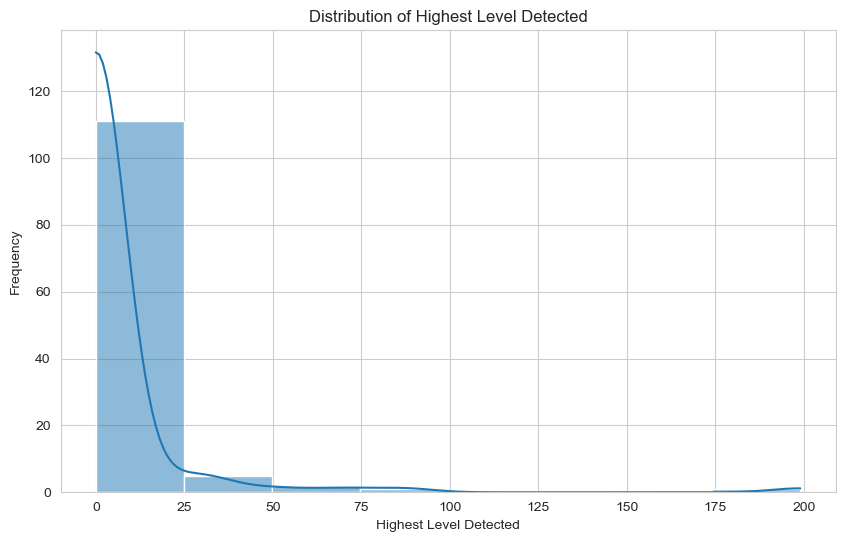

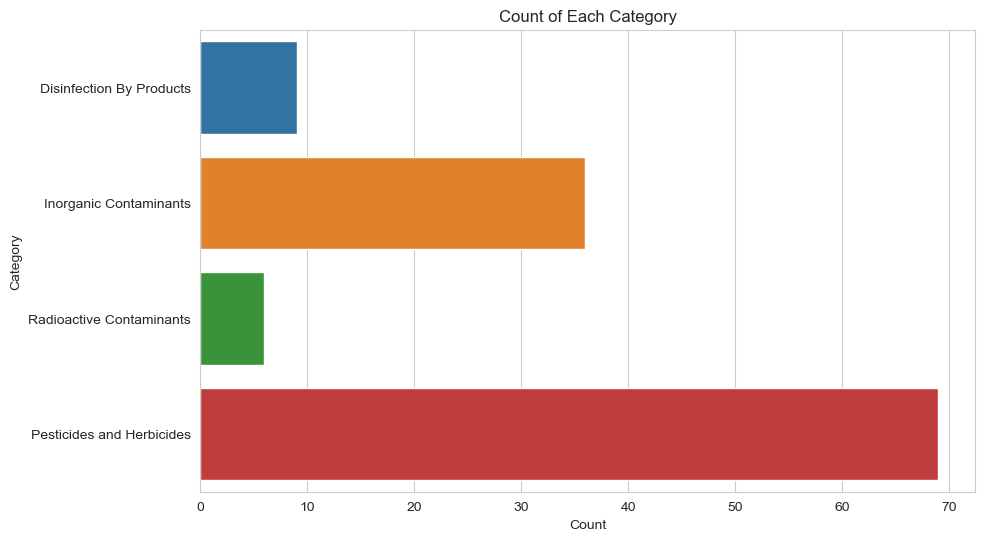

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of 'Highest Level Detected'
plt.figure(figsize=(10, 6))
sns.histplot(df['Highest Level Detected'].dropna(), kde=True)
plt.title('Distribution of Highest Level Detected')
plt.xlabel('Highest Level Detected')
plt.ylabel('Frequency')
plt.show()

# Plot the count of each Category
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df)
plt.title('Count of Each Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

                    Category  Highest Level Detected
0   Disinfection By Products               30.100000
1     Inorganic Contaminants                8.061500
2  Pesticides and Herbicides                0.012464
3   Radioactive Contaminants                0.783333


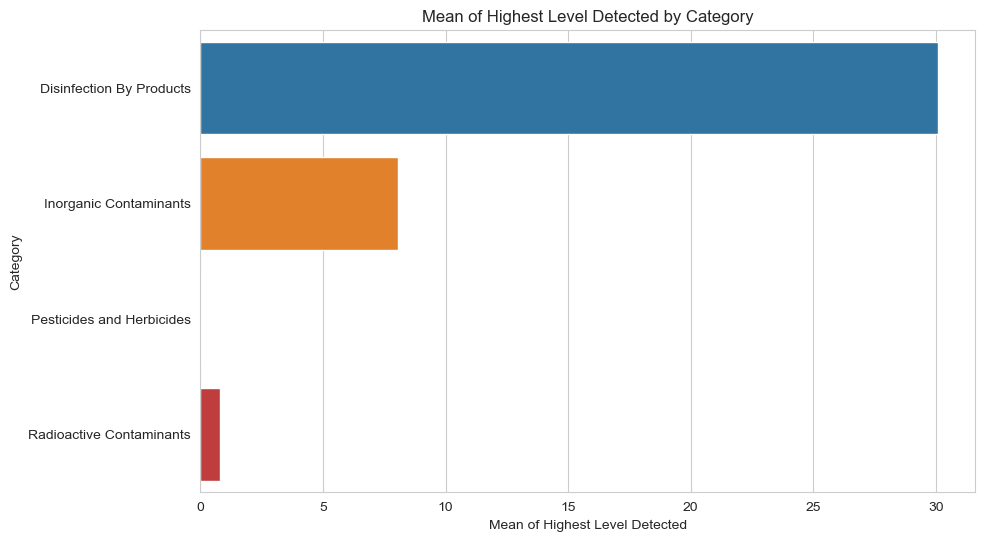

              Chemical Compounds  Count
0  Total Haloacetic Acids (HAA5)      3
1                       Alachlor      3
2                       Simazine      3
3                   Methoxychlor      3
4                        Lindane      3
5              Hexachlorobenzene      3
6             Heptachlor epoxide      3
7                     Heptachlor      3
8                         Endrin      3
9    Di (2-ethylhexyl) phthalate      3


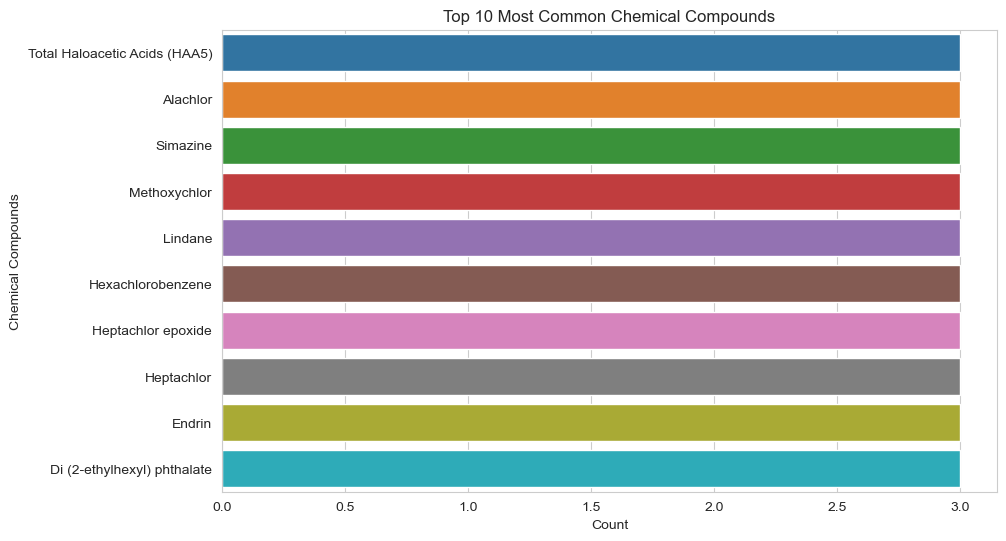

In [69]:
# Group by Category and compute the mean of 'Highest Level Detected'
category_mean = df.groupby('Category')['Highest Level Detected'].mean().reset_index()
print(category_mean)

# Plot the mean of 'Highest Level Detected' for each Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Highest Level Detected', y='Category', data=category_mean)
plt.title('Mean of Highest Level Detected by Category')
plt.xlabel('Mean of Highest Level Detected')
plt.ylabel('Category')
plt.show()

# Group by Chemical Compounds and count occurrences
compound_counts = df['Chemical Compounds'].value_counts().reset_index()
compound_counts.columns = ['Chemical Compounds', 'Count']
print(compound_counts.head(10))

# Plot the top 10 most common Chemical Compounds
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Chemical Compounds', data=compound_counts.head(10))
plt.title('Top 10 Most Common Chemical Compounds')
plt.xlabel('Count')
plt.ylabel('Chemical Compounds')
plt.show()

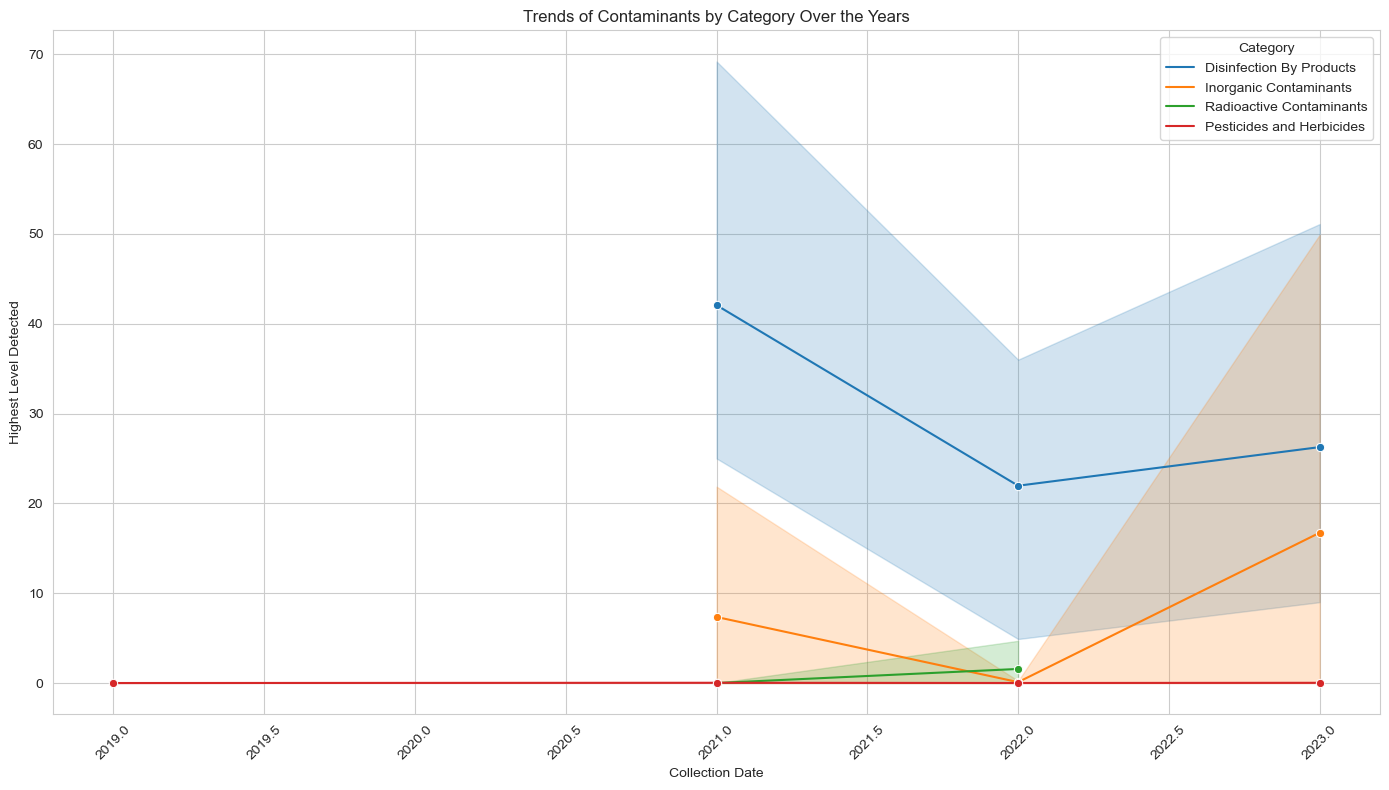

In [70]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the trends over time for each category
plt.figure(figsize=(14, 8))

# Use seaborn lineplot for better visualization
sns.lineplot(data=df, x='Collection Date', y='Highest Level Detected', hue='Category', marker='o')

# Customize the plot
plt.title('Trends of Contaminants by Category Over the Years')
plt.xlabel('Collection Date')
plt.ylabel('Highest Level Detected')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Save files to for exporting

In [60]:
# Save as .csv
df.to_csv('cleaned_regulated_contaminates.csv')

# Save as .xlsx
df.to_excel('cleaned_regulated_contaminates.xlsx')